## Instalação do Tesseract e importações

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,033 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [2]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow

## Primeiro Reconhecimento de textos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
imagem = cv2.imread('/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Images/teste01.jpg')

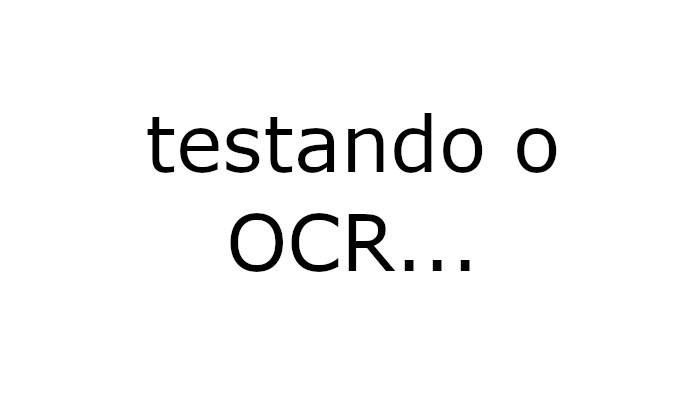

In [5]:
cv2_imshow(imagem)

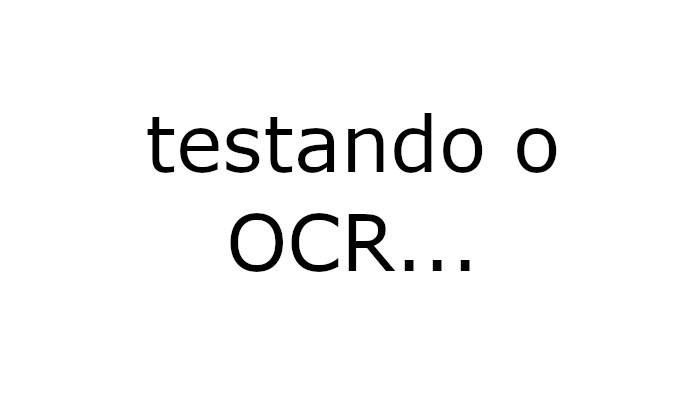

In [7]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
cv2_imshow(imagem)

In [8]:
texto = pytesseract.image_to_string(imagem)
print(texto)

testando o
OCR...



## Suporte para o idoma português

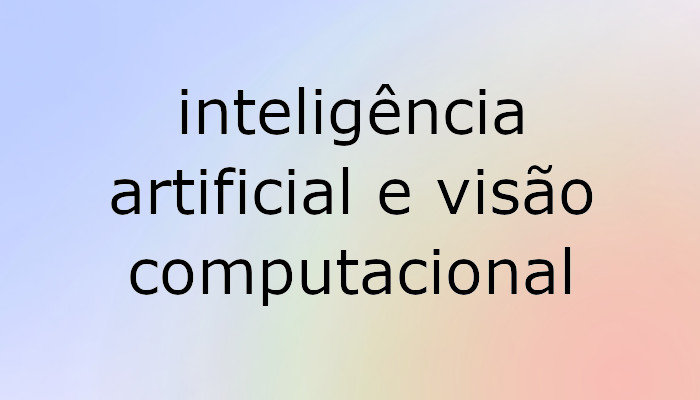

In [9]:
imagem = cv2.imread('/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Images/teste02.jpg')
cv2_imshow(imagem)

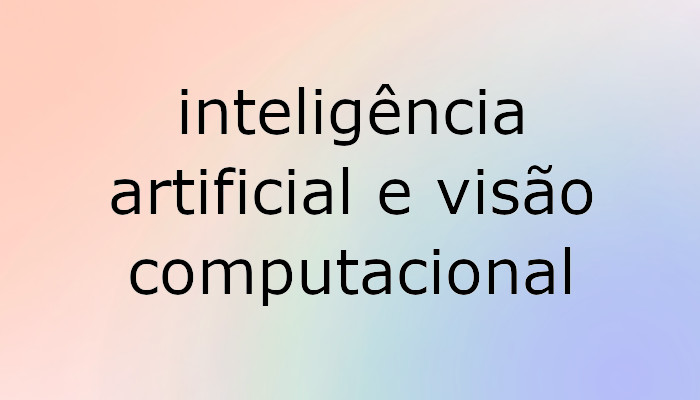

In [10]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
cv2_imshow(imagem)

In [12]:
texto = pytesseract.image_to_string(imagem)
print(texto)

inteligéncia
artificial e visao
computacional



In [13]:
!tesseract --list-langs

List of available languages (2):
eng
osd


In [17]:
!apt-get install -y tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-por all 1:4.00~git30-7274cfa-1.1 [856 kB]
Fetched 856 kB in 1s (1,346 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 123669 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...


In [18]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


In [19]:
texto = pytesseract.image_to_string(imagem, lang='por')
print(texto)


inteligência
artificial e visão
computacional



In [20]:
!mkdir tessdata

In [21]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

--2024-10-26 10:53:16--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata [following]
--2024-10-26 10:53:17--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2024-10-26 10:53:17--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.1

In [22]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(imagem, lang='por', config=config_tesseract)
print(texto)

inteligência
artificial e visão
computacional



## Parâmetro PSM (Page Segmentation Mode)

In [23]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [25]:
imagem = cv2.imread('/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Images/trecho-livro.jpg')

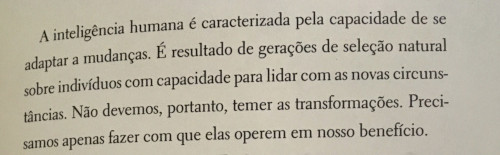

In [31]:
# imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
cv2_imshow(imagem)

In [32]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(imagem, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
“obre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.

